**CC task Round 2. RAG model based to query SI  and placement chronicles pdf**

**Importing Necessary libraries**

In [1]:
!pip install langchain
#!pip install tiktoken #creare tokens in context of OpenAI. but now we dont need them
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 854.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00


Poor at scanning text in a little fancy pdf. Switched to PdfPlumber



In [ ]:
from pypdf import PdfReader#chomu

Efficient in scanning text which is not in direct document format. Has better way to understrand PDF layout

In [2]:
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 53.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pdfplumber
pdf = pdfplumber.open("/content/Bulletin_2024-25.pdf")
text = ""
for sheet in pdf.pages:
  text = text + sheet.extract_text()
#sheet word is assigned to every page in the pdf, and after each loop(1 page) it extracts the texts in it, and adds it up!

#/content/drive/MyDrive/CC_Tasks/Placement_Chronicles_2023-24.pdf
#/content/drive/MyDrive/CC_Tasks/SI Chronicles 23-24 Sem I.pdf


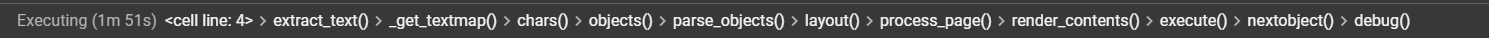

Very interesting to know how the pdfplumber goes through every step.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
#this works in creating chunks of particular sizes. now this can be in document format or a text chunk. it deoens in which forms we are passing them ahead.

In [ ]:
!pip install -U -q google-generativeai
import numpy as np #not needed, as we arent making any array, [could have been used to store embedings in point floating format, but google embedings take care of it] or do any math
#import pandas as pd; not needed as we dont have to deal with much tabular data format
import google.generativeai as genai #using gemini and its embedings
from google.colab import userdata #for ease in hiding api key
from IPython.display import Markdown #for nice display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 15.8 MB/s eta 0:00:00


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ".", "!", "?", " ", ""],#this does not imply, that at every fullstop and \n it will split, rather it will use this paramters to do so keeping in mind the chunk size
    chunk_size=600,
    chunk_overlap=100, #to ensure preservation of context
    length_function=len

)
texts = text_splitter.split_text(text)#the crazy thing and th mistake i was commiting is creating documents out these, which were intitally reqired for openai, but retrieval i
#had issue, u can actually just create text hunks too. document formating isnt a compulsory thing
texts[3]

'BITS Design School BITS School of Management\nProf. Ashish Bharadwaj\nBITS Law School\nChief Finance Officer (On Deputation) and CEO (Non-Academic functions), Mumbai campus\nMr. Arun Khetan\nPostal Address:\nBITS Pilani – 333 031\nRajasthan, India\nFAX No. : 91-1596-244183\nBITS Home Page: http://www.bits-pilani.ac.inINSTITUTE EMBLEM\nThe Emblem of the Institute represents a\nsynthesis of Science, Humanities and Engineering\nwith Lotus representing Humanities and Social\nSciences, the Structure of Molecule representing\nScience, and the Figure of Rocket representing\nEngineering & Technology.\nThe Motto is –'

clearly there seems to be text mixed with \n. why not clean it to have peaceful embeddings

In [ ]:
res = []
for sub in texts:
    res.append(sub.replace("\n", " "))

# printing result
res

NameError: name 'texts' is not defined

In [ ]:
import re
def clean_text(text):
    # Remove newlines and replace multiple spaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', text).strip() #\s+ cleans all \n or \n\n
    return cleaned_text

# Apply the cleaning function to each text in the list
texts = [clean_text(text) for text in texts]
texts[3]

'and in a variety of different roles. I encourage future batches to explore not only this edition but also previous ones to gain a comprehensive understanding of what Shreekar Puranik companies seek and how to secure a placement or internship. Wishing everyone the very best of luck! Placement Coordinator Facing one of the toughest job markets after the 2009 recession, our students worked hard and proved their mettle. I hope that these challenging times have prepared the batch for the dynamic job landscape. We had the fortune of hosting some exciting new recruiters'

In [ ]:
len(texts)


6303

In [ ]:
Google_api_key = userdata.get('banana') #its ur gateway, special key to communicate with gemini and request it to help u out
genai.configure(api_key=Google_api_key)

In [ ]:
!pip install -U langchain-google-genai


  Using cached google_generativeai-0.7.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached google_ai_generativelanguage-0.6.6-py3-none-any.whl.metadata (5.6 kB)
Using cached google_generativeai-0.7.2-py3-none-any.whl (164 kB)
Using cached google_ai_generativelanguage-0.6.6-py3-none-any.whl (718 kB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.10
    Uninstalling google-ai-generativelanguage-0.6.10:
      Successfully uninstalled google-ai-generativelanguage-0.6.10
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.8.2
    Uninstalling google-generativeai-0.8.2:
      Successfully uninstalled google-generativeai-0.8.2


In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001", google_api_key=Google_api_key)

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain.vectorstores import Chroma

Chroma helps in converting the list of texts, into embedings using google embeddings. as this vector index is used as retriever, meaning it will return the closest 'k' documents in comaprison to another vector(which is out query here)

In [ ]:
vector_index = Chroma.from_texts(res, embeddings).as_retriever(search_kwargs={"k": 4})

In [ ]:
from langchain.chains import RetrievalQA
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain

One of the biggest crack i found here, was that gemini-pro wasnt simply working. turns our their updated ones do. though its a seemingly easy fix, i had no clue initally about it.

In [ ]:
model = ChatGoogleGenerativeAI(model = "gemini-1.5-flash", google_api_key=Google_api_key, temperature = 0.1, convert_system_message_to_human = True)

In [ ]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="Convert_system_message_to_human will be deprecated!")

In [ ]:
from langchain.prompts import PromptTemplate
template = """ end your answer with Thanks for asking CC.
{context}
Question; {question}
Helpful answer: """
QA_chain_prompt = PromptTemplate.from_template(template)
qa_chain = RetrievalQA.from_chain_type(
    llm = model,
    retriever = vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_chain_prompt}
)

#when i detailed the template to solely stick to the context, which it is already doing by default, it turned out to giving stricter outputs, often missing some imp data
#like what was the official cg cutoff. so I didnt pressurize it much!

Put your question in the box below!

In [ ]:
question = "who should i consult for a robotics project of mine, which dels should i take "
result = qa_chain.invoke({"query": question}) #langchain says, invoke is the new way to speak now.
Markdown(result["result"])


Based on the information provided, you should consult with a professor in the Robotics or Electrical Engineering department.  

Here's why:

* **Robotics Focus:** The courses listed heavily emphasize robotics and related fields like control systems, artificial intelligence, and machine learning. This suggests a strong robotics focus within the department.
* **Relevant Courses:**  Courses like BITS F441 Robotics, BITS F327 Artificial Intelligence for Robotics, and BITS F451 Autonomous Mobile Robotics directly relate to your robotics project.
* **Senior Design Project:** The mention of EE 408: Senior Seminar and EE 499: Independent Study tied to a senior design project indicates that faculty members are involved in guiding student projects.

**Recommended Departments:**

* **Robotics:** If your project is specifically focused on robotics, a professor in the Robotics department would be the most suitable choice.
* **Electrical Engineering:** If your project involves electrical engineering aspects, a professor in the Electrical Engineering department would be a good option.

**Next Steps:**

1. **Identify Professors:** Look up the faculty profiles in the Robotics and Electrical Engineering departments.
2. **Review Research Interests:** Check their research interests to see if they align with your project.
3. **Contact Professors:** Reach out to professors whose research interests match your project and express your interest in collaborating.

Thanks for asking CC. 
